# Akaike information criterion (AIC) in epistasis models

Analyzing model selection when studying high order epistasis.

In [25]:
# plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# imports from epistasis package
from epistasis.artificial import ArtificialMap
from epistasis.models import ProjectedEpistasisModel
from epistasis.utils import build_interaction_labels, epistatic_order_indices
from epistasis.plotting import epistasis_bar

Computationally generate genotype-phenotype map

In [2]:
length = 6
order = 6
data = ArtificialMap(length, order)

In [14]:
labels = build_interaction_labels(length, order)

In [10]:
model = ProjectedEpistasisModel(data.wildtype, data.genotypes, data.phenotypes, parameters=labels)

In [11]:
model.fit()

(<matplotlib.figure.Figure at 0x10a94eb38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a96f4a8>)

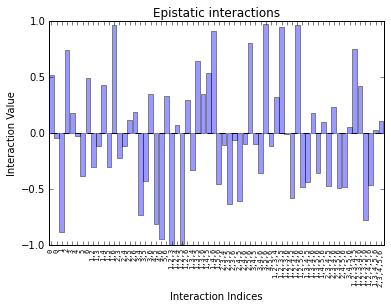

In [7]:
epistasis_bar(model)

(<matplotlib.figure.Figure at 0x10a9d2780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a94e588>)

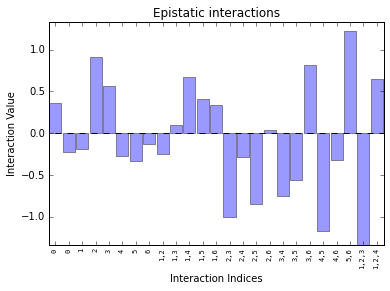

In [12]:
epistasis_bar(model)

## Calculating the Akaike information criterion metric

AIC provides a metric is maximum likelihood approach that explicitly avoids overfitting. This is achieved by penalizing adding models. 

The AIC value is:
$$
AIC = 2k - 2ln(L)
$$
where $k$ is the number of parameters in the model and $L$ is the maximum likelihood of the model (coefficient of determination in this case).

In [23]:
def AIC(L, k):
    """ Calculate the Akaike information criterion value."""
    return 2*k - 2*np.log(L)    

In [19]:
epistatic_order_indices(length, 1)

(1, 7)

In [40]:
# Null model criterion
parameters0 = labels[:(length+1)]
model = ProjectedEpistasisModel(data.wildtype, data.genotypes, data.phenotypes, parameters=parameters)
model.fit()
criterion0 = AIC(model.score, len(parameters))

# comparing aics from null model to second order
scores = list()
ratios = list()
for i in range(*epistatic_order_indices(length,2)):
    parameters = labels[:(length+1)] + [labels[i]]
    model = ProjectedEpistasisModel(data.wildtype, data.genotypes, data.phenotypes, parameters=parameters)
    model.fit()
    criterion = AIC(model.score, len(parameters))
    scores.append(criterion)
    ratios.append(np.exp(criterion0 - criterion)/2.0)
ratios

[0.49507002886169649,
 0.50173974429486612,
 0.51332401581906117,
 0.55464368447951873,
 0.50413717710436401,
 0.54871231540739862,
 0.67352097231362329,
 0.49400338041860348,
 0.53692659609262616,
 0.49403826932430278,
 0.52752482853352078,
 0.5131083772647661,
 0.53428701605000495,
 0.57882720590606562,
 0.5]

In [ ]:
# Null model criterion
parameters0 = labels[:(length+1)]
model = ProjectedEpistasisModel(data.wildtype, data.genotypes, data.phenotypes, parameters=parameters)
model.fit()
criterion0 = AIC(model.score, len(parameters))

# comparing aics from null model to second order
scores = list()
ratios = list()
for i in range(*epistatic_order_indices(length,2)):
    parameters = labels[:(length+1)] + [labels[i]]
    model = ProjectedEpistasisModel(data.wildtype, data.genotypes, data.phenotypes, parameters=parameters)
    model.fit()
    criterion = AIC(model.score, len(parameters))
    scores.append(criterion)
    ratios.append(np.exp(criterion0 - criterion)/2.0)
ratios